# **Extract the dataset.**

In [69]:
import zipfile
import os

uploaded_zip_path = '/content/dataset.zip'
extract_path = '/content/NewDataSet'  # Path to extract the dataset

# Create the extract directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'Dataset extracted to {extract_path}')


Dataset extracted to /content/NewDataSet


In [70]:
# List files in the extracted directory
extracted_files = os.listdir(extract_path)
print(f'Extracted files: {extracted_files}')


Extracted files: ['__MACOSX', 'dataset']


# **Q1**

In [71]:
import shutil
from sklearn.model_selection import train_test_split

# Define paths
test_dir = '/content/NewDataSet/dataset/test'
train_dir = '/content/NewDataSet/dataset/train'
temp_train_dir = '/content/NewDataSet/dataset/temp_train'
temp_validation_dir = '/content/NewDataSet/dataset/temp_validation'

# Create temporary directories for split data
os.makedirs(temp_train_dir, exist_ok=True)
os.makedirs(temp_validation_dir, exist_ok=True)

# Function to split data into training and validation sets
def split_data(source_dir, train_dir, val_dir, train_size=0.7):
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, val_images = train_test_split(images, train_size=train_size)

            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

            for image in train_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))
            for image in val_images:
                shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_name, image))

# Split the test data into training and validation sets
split_data(test_dir, temp_train_dir, temp_validation_dir, train_size=0.7)


In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    temp_train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    temp_validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 395 images belonging to 2 classes.
Found 269 images belonging to 2 classes.


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Function to build the CNN model
def build_model(input_shape, num_classes):
    model = Sequential()

    # Add 5 convolutional layers each followed by ReLU activation and max pooling
    for i in range(5):
        filters = 32 * (2 ** i)
        if i == 0:
            model.add(Conv2D(filters, (3, 3), padding='same', input_shape=input_shape))
        else:
            model.add(Conv2D(filters, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output of the last conv layer
    model.add(Flatten())

    # Add a dense layer
    model.add(Dense(512, activation='relu'))

    # Add output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build and compile the model
input_shape = (64, 64, 3)
num_classes = 10
model = build_model(input_shape, num_classes)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_8 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 activation_9 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                               

# **Alternative ans for Q1(Simplest)**

In [74]:
def build_model(input_shape, num_classes, num_filters=32, filter_size=(3, 3), activation='relu', dense_neurons=512):
    model = Sequential()

    # Add convolutional layers
    for _ in range(5):
        model.add(Conv2D(num_filters, filter_size, padding='same', input_shape=input_shape))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Add dense layer
    model.add(Dense(dense_neurons, activation='relu'))

    # Add output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [75]:
# Define parameters
input_shape = (64, 64, 3)
num_classes = 10
num_filters = 64
filter_size = (5, 5)
activation = 'elu'
dense_neurons = 1024

# Build and compile the model with custom parameters
model = build_model(input_shape, num_classes, num_filters, filter_size, activation, dense_neurons)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 64, 64, 64)        4864      
                                                                 
 activation_13 (Activation)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 64)        102464    
                                                                 
 activation_14 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                               

# **Q1(a)**

In [76]:
# Define constants
num_filters = 32
filter_size = 3
input_height = 64
input_width = 64
dense_neurons = 512

# Total computations in convolutional layers
total_conv_computations = 0
for _ in range(5):
    total_conv_computations += num_filters * (filter_size ** 2) * (input_height - (filter_size - 1)) * (input_width - (filter_size - 1))
    input_height //= 2  # Max pooling reduces height by half
    input_width //= 2  # Max pooling reduces width by half

# Total computations in the dense layer
total_dense_computations = dense_neurons * (input_height * input_width * num_filters)

# Total computations
total_computations = total_conv_computations + total_dense_computations

print("Total computations:", total_computations)


Total computations: 1499776


# **Q1(b)**

In [77]:
def calculate_total_parameters(m, k, num_neurons_dense_layer):

    num_neurons_prev_layer = 64 * 64 * m  # Assuming the output feature map size is 64x64

    # Total parameters in convolutional layers
    total_conv_params = m * (k * k + 1)

    # Total parameters in dense layer
    total_dense_params = num_neurons_prev_layer * num_neurons_dense_layer + num_neurons_dense_layer

    # Total parameters in the network
    total_params = total_conv_params * 5 + total_dense_params

    return total_params


m = 32  # Number of filters
k = 3   # Size of filters (assuming square filters)
num_neurons_dense_layer = 512  # Number of neurons in the dense layer

# Calculate total parameters
total_parameters = calculate_total_parameters(m, k, num_neurons_dense_layer)
print("Total number of parameters in the network:", total_parameters)


Total number of parameters in the network: 67110976


# **Q5**

In [20]:
!pip install wandb

In [21]:
!pip install --upgrade wandb

# **Q5**

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from wandb.integration.keras import WandbCallback
import wandb

In [41]:
import os
import wandb

# Set WANDB_API_KEY environment variable (replace 'your_api_key' with your actual API key)
os.environ['WANDB_API_KEY'] = '5237a13f8f1acba19960eff228299c80defa0a3d'

# Initialize wandb
wandb.login()
wandb.init(project="Q2", entity="praba00021")


train_data_dir = '/content/NewDataSet/dataset/train'
test_data_dir = '/content/NewDataSet/dataset/test'


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,▅▄▅▇▅▄▁▅▄█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▄▃▆▅▄▁▂▂
val_accuracy,▃▁▄▁▄█▃▇▅▅
val_loss,▅█▃▅▅▂▅▂▁▄
accuracy,0.54608
best_epoch,8
best_val_loss,0.68924
epoch,9
loss,0.6912
val_accuracy,0.54688


In [43]:
# Prepare data generators with validation split and enhanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1  # Split 10% of training data for validation
)

In [44]:
# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 586 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [45]:
# Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 408 images belonging to 2 classes.


In [46]:
# Print class indices to verify
print(train_generator.class_indices)


{'Dogs': 0, 'cats': 1}


In [58]:
# Define a more complex CNN model to improve accuracy
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model



In [59]:
# Define a more complex CNN model to improve accuracy with padding and additional layers
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [60]:
# Build and compile the complex model
best_model = build_cnn_model(input_shape=(64, 64, 3), num_classes=train_generator.num_classes)
best_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the complex model
history = best_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[WandbCallback()]
)

Epoch 1/10
19/19 [==============================] - 20s 932ms/step - loss: 0.6959 - accuracy: 0.5017 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 2/10
19/19 [==============================] - 19s 1s/step - loss: 0.6986 - accuracy: 0.4812 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 3/10
19/19 [==============================] - 17s 907ms/step - loss: 0.6932 - accuracy: 0.5051 - val_loss: 0.6923 - val_accuracy: 0.5156
Epoch 4/10
19/19 [==============================] - 17s 906ms/step - loss: 0.6938 - accuracy: 0.4863 - val_loss: 0.6924 - val_accuracy: 0.5312
Epoch 5/10
19/19 [==============================] - 17s 918ms/step - loss: 0.6916 - accuracy: 0.5119 - val_loss: 0.6930 - val_accuracy: 0.5469
Epoch 6/10
19/19 [==============================] - 19s 979ms/step - loss: 0.6899 - accuracy: 0.5461 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/10
19/19 [==============================] - 18s 891ms/step - loss: 0.6913 - accuracy: 0.5392 - val_loss: 0.6898 - val_accuracy: 0.5938
Ep

In [61]:
# Ensure test_generator is reset before evaluation
test_generator.reset()

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


13/13 [==============================] - 3s 211ms/step - loss: 0.6857 - accuracy: 0.5956
Test accuracy: 0.5956
Test loss: 0.6857


1/1 [==============================] - 0s 202ms/step


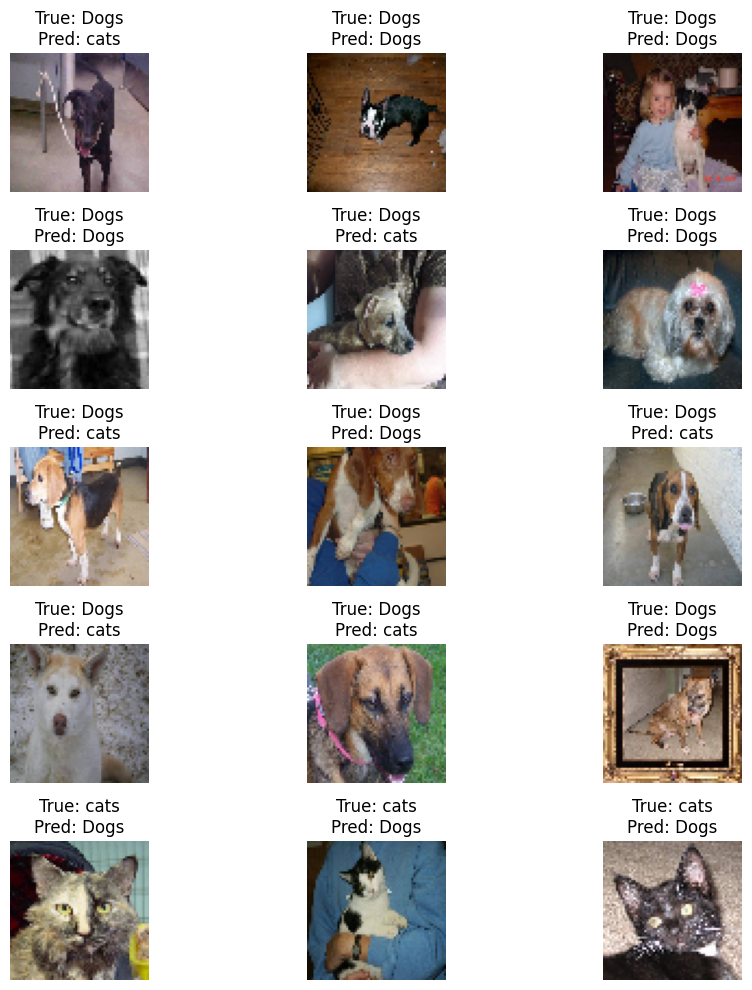

In [68]:
# Make predictions on sample test images and display results
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get some sample images from the test set
test_images, test_labels = next(test_generator)
predictions = best_model.predict(test_images)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(15):  # Display first 15 images
    plt.subplot(5, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = class_labels[np.argmax(test_labels[i])]
    predicted_label = class_labels[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Testing**

1/1 [==============================] - 0s 50ms/step
Predicted Class: Cat


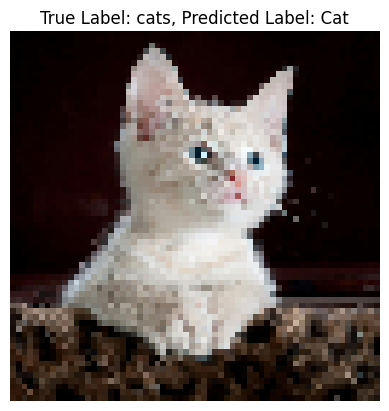

In [88]:
import matplotlib.pyplot as plt

# Load the image
img_path = "/content/pexels-pixabay-45201.jpg"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Make prediction using the model
prediction = best_model.predict(img_array)

# Get class labels
class_labels = ['Cat', 'Dog']

# Print prediction
predicted_class = class_labels[np.argmax(prediction)]
print("Predicted Class:", predicted_class)

# Display the image with predicted class
plt.imshow(img)
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class}")
plt.axis('off')
plt.show()
